In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Auxiliar Functions

In [3]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge([r,g,b]) # merge in rgb order to display with matplotlib

In [7]:
# power law tranformation
def power_law_lut(c, g):
    table = np.zeros(256,'uint8')

    table = np.array([( c * (i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return np.array([table.astype('uint8')])

In [8]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

# Iris

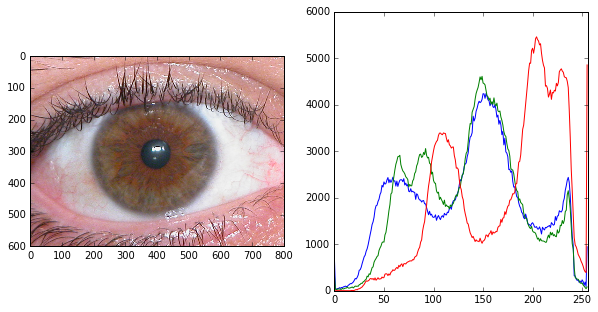

In [9]:
img = cv2.imread('../colorImages/iris.jpg')
img1 = cv2.imread('../colorImages/iris_1.jpg')
img2 = cv2.imread('../colorImages/iris_2.jpg')
img3 = cv2.imread('../colorImages/iris_3.jpg')
img4 = cv2.imread('../colorImages/iris_4.jpg')

plt.figure(figsize=(10,5)) 

plt.subplot(121)
plt.imshow(invertChannels(img))

plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    

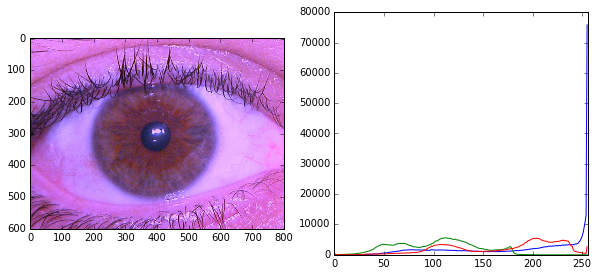

In [11]:
plt.figure(figsize=(10,20)) 

plt.subplot(423);plt.imshow(invertChannels(img2))
plt.subplot(424)
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  

# Iris_2 Image filtering

(0, 256)

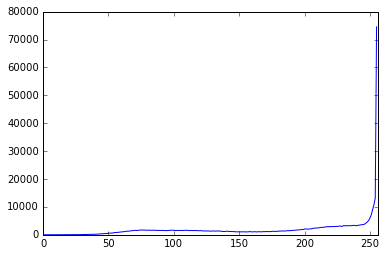

In [36]:
histr = cv2.calcHist([img2],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256])  

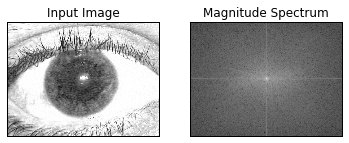

In [149]:
dft = cv2.dft(np.float32(img2[:,:,0]),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img2[:,:,0], cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

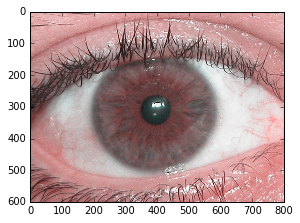

In [13]:
plt.figure(figsize=(10,10)) 
b,g,r = cv2.split(img) # split channels
img2r = cv2.merge([r,g,g])
plt.subplot(121)
plt.imshow(img2r)


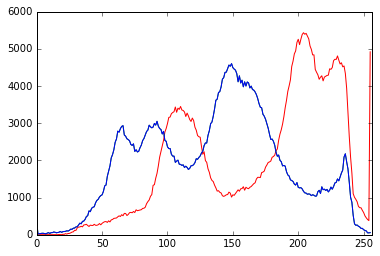

In [160]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img2r],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

In [161]:
# mean square error comparation
print "MSE between Original and Iris2: %s" % mse(img,img2)
print "MSE between Original and Iris enchanced: %s" % mse(img,img2r)

MSE between Original and Iris2: 4641.24975208
MSE between Original and Iris enchanced: 3893.86669792


# HSL space

In [162]:
# Convert BGR to HSV
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

In [167]:
h,s,v = cv2.split(img2_hsv)

(0, 256)

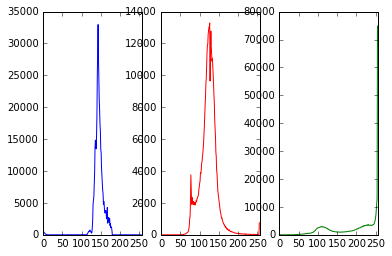

In [174]:
plt.subplot(131)
histr = cv2.calcHist([h],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 

plt.subplot(132)
histr = cv2.calcHist([s],[0],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])

plt.subplot(133)
histr = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])

In [175]:
# Convert BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

(0, 256)

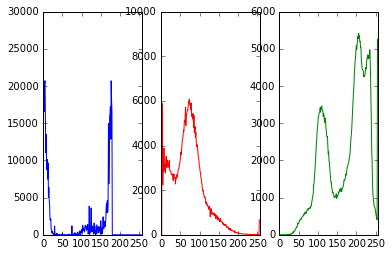

In [176]:
plt.subplot(131)
histr = cv2.calcHist([h],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 

plt.subplot(132)
histr = cv2.calcHist([s],[0],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])

plt.subplot(133)
histr = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])